# Exploratory Data Analysis (EDA)

This notebook performs a structured EDA on the dataset located in the project folder

## Objectives
1. Load data safely
2. Perform data quality checks
3. Summarize numeric & categorical variables
4. Explore outliers, distributions & correlations
5. Export a clean dataset for modeling


In [176]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize


nltk.download('punkt')
nltk.download('stop_words')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

df = pd.read_csv('judge_1377884607_tweet_product_company.csv')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading stop_words: Package 'stop_words' not found
[nltk_data]     in index
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [125]:
#loading dataset
df = pd.read_csv('judge_1377884607_tweet_product_company.csv')
print("Shape of dataset:", df.shape)
print("\nColumns and data types:")
print(df.dtypes)


Shape of dataset: (8721, 3)

Columns and data types:
tweet_text                                            object
emotion_in_tweet_is_directed_at                       object
is_there_an_emotion_directed_at_a_brand_or_product    object
dtype: object


# 1. Dataset Overview

In [169]:
df.info()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8720 non-null   object
 1   emotion_in_tweet_is_directed_at                     3169 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8721 non-null   object
dtypes: object(3)
memory usage: 204.5+ KB


22

In [170]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows where text is missing
df = df.dropna(subset=['tweet_text'])

print("After cleaning, shape is:", df.shape)


After cleaning, shape is: (8698, 3)


In [171]:
# Value counts for categorical variables
for col in df.columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(normalize=True) * 100)

# Unique values summary
print("\nUnique values per column:\n", df.nunique())



--- tweet_text ---
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW                               0.022994
RT @mention RT @mention It's not a rumor: Apple is opening up a temporary store in downtown Austin for #SXSW and the iPad 2 launch {link}    0.022994
Win free ipad 2 from webdoc.com #sxsw RT                                                                                                     0.022994
Win free iPad 2 from webdoc.com #sxsw RT                                                                                                     0.022994
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw                               0.022994
                                                                                                                                               ...   
RT @mention RT @mention Google to Launch Major New Social Network Called Circles

## Pattern and Distribution exploration

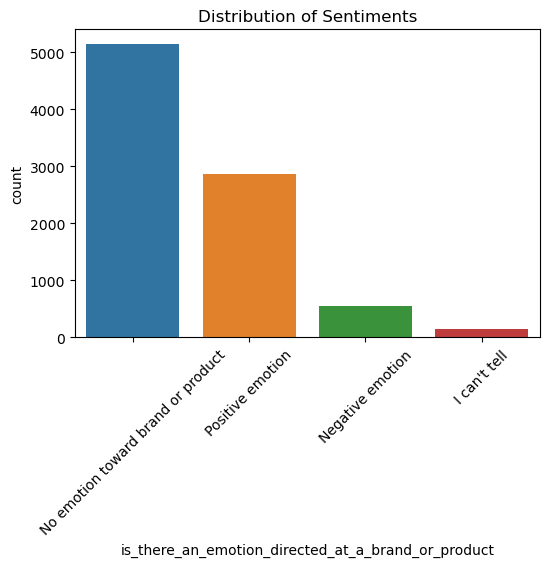

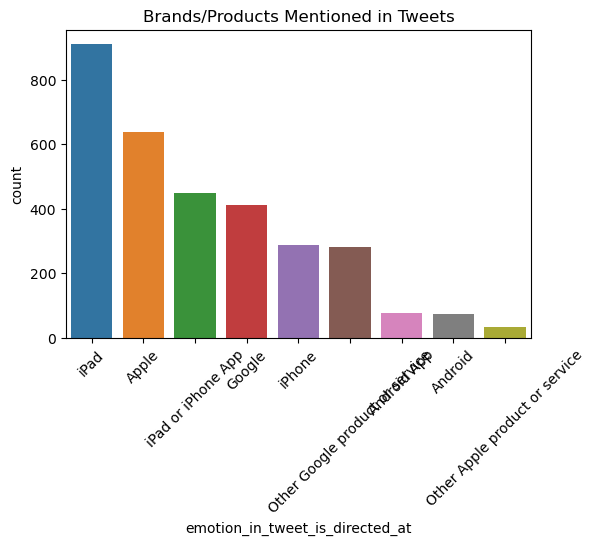

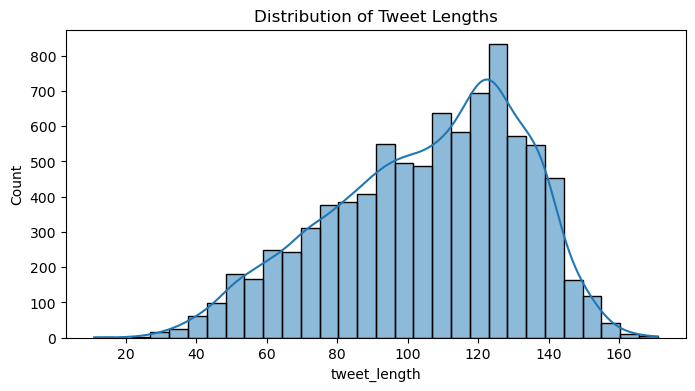

In [173]:
# Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="is_there_an_emotion_directed_at_a_brand_or_product",
              order=df["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts().index)
plt.title("Distribution of Sentiments")
plt.xticks(rotation=45)
plt.show()

# Brand mentions distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="emotion_in_tweet_is_directed_at",
              order=df["emotion_in_tweet_is_directed_at"].value_counts().index)
plt.title("Brands/Products Mentioned in Tweets")
plt.xticks(rotation=45)
plt.show()

# Tweet text length analysis
df["tweet_length"] = df["tweet_text"].astype(str).apply(len)

plt.figure(figsize=(8,4))
sns.histplot(df["tweet_length"], bins=30, kde=True)
plt.title("Distribution of Tweet Lengths")
plt.show()


## Preprocessing Tweet Text for NLP

In [177]:
# Text preprocessing function
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    # Remove mentions & hashtags
    text = re.sub(r"@\w+|#\w+", "", text)
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [w for w in tokens if w not in stopwords.words("english")]
    # Rejoin
    return " ".join(tokens)

# Apply cleaning
df["clean_text"] = df["tweet_text"].astype(str).apply(clean_text)

# Preview cleaned text
df[["tweet_text", "clean_text"]].head(10)


,tweet_text,clean_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,3g iphone 3 hrs tweeting dead need upgrade plu...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,wait 2 also sale
3,@sxsw I hope this year's festival isn't as cra...,hope years festival isnt crashy years iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff fri marissa mayer google tim oreil...
5,@teachntech00 New iPad Apps For #SpeechTherapy...,new ipad apps communication showcased conference
6,NaN,nan
7,"#SXSW is just starting, #CTIA is around the co...",starting around corner hop skip jump good time...
8,Beautifully smart and simple idea RT @madebyma...,beautifully smart simple idea rt wrote ipad app
9,Counting down the days to #sxsw plus strong Ca...,counting days plus strong canadian dollar mean...


Exporting Clean Dataset

In [153]:
print(df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts())
print(df['emotion_in_tweet_is_directed_at'].value_counts())


No emotion toward brand or product    5142
Positive emotion                      2861
Negative emotion                       544
I can't tell                           151
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64
iPad                               909
Apple                              638
iPad or iPhone App                 450
Google                             410
iPhone                             287
Other Google product or service    282
Android App                         77
Android                             73
Other Apple product or service      34
Name: emotion_in_tweet_is_directed_at, dtype: int64


## Visuals

# Explore Outliers, Distributions & Correlations

## Target Variable Distribution

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt


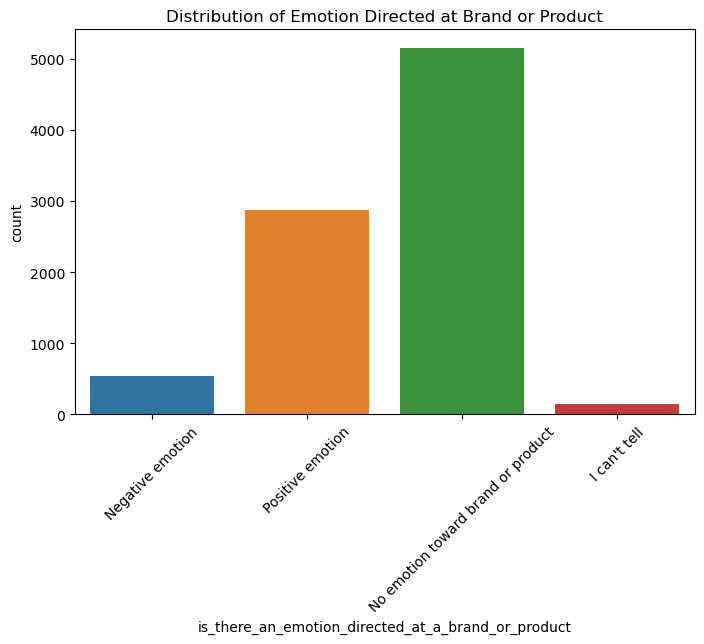

In [139]:
# have emotions vs don’t have
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='is_there_an_emotion_directed_at_a_brand_or_product')
plt.xticks(rotation=45)   # rotate labels if long
plt.title("Distribution of Emotion Directed at Brand or Product")
plt.show()


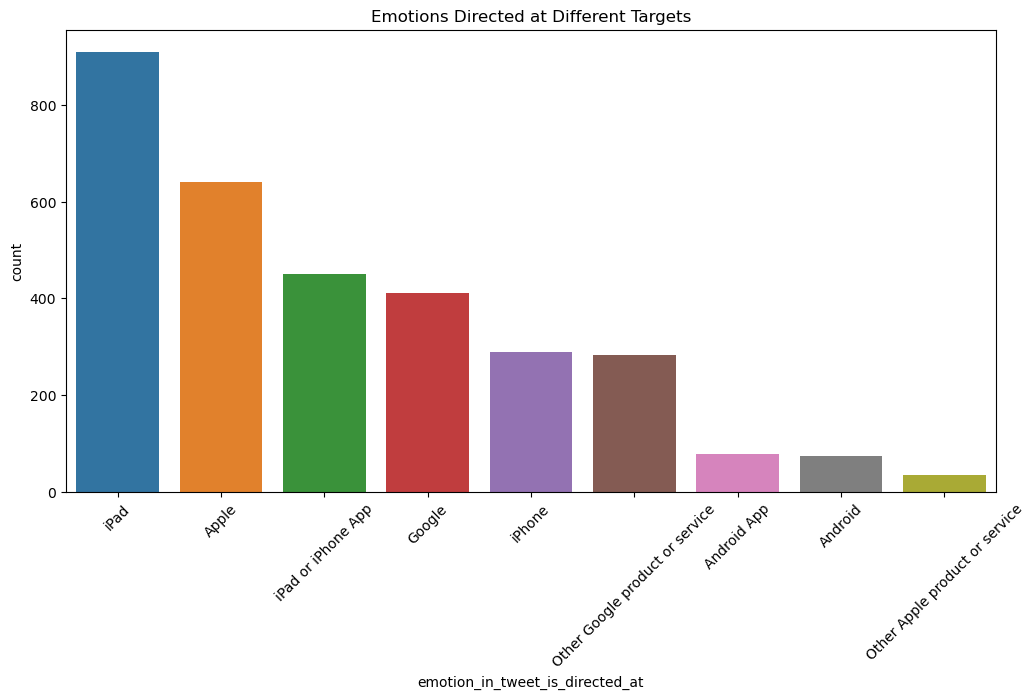

In [141]:
# Emotion categories 
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='emotion_in_tweet_is_directed_at',
              order=df['emotion_in_tweet_is_directed_at'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Emotions Directed at Different Targets")
plt.show()

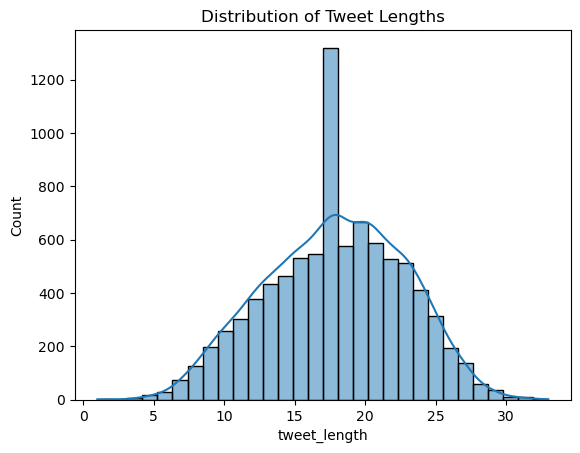

In [142]:
# Text Length Analysis
df['tweet_length'] = df['tweet_text'].apply(lambda x: len(str(x).split()))
sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.title("Distribution of Tweet Lengths")
plt.show()


## Word Clouds

In [160]:
# Define the target column explicitly
target_col = 'is_there_an_emotion_directed_at_a_brand_or_product'

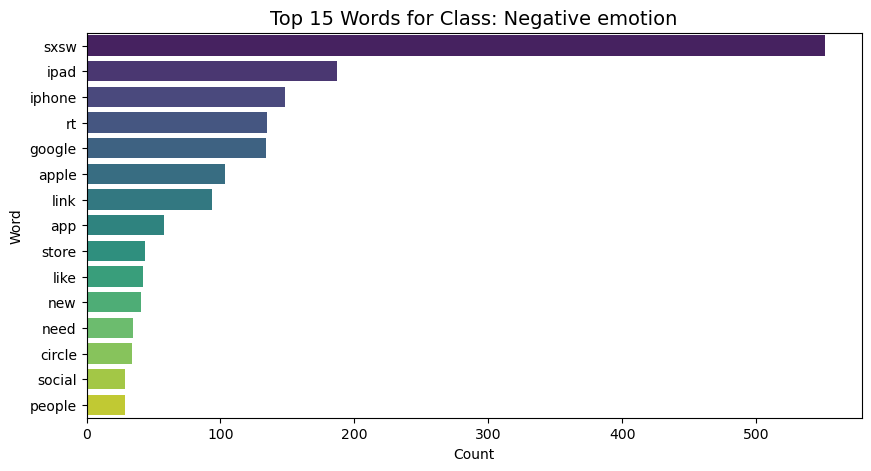

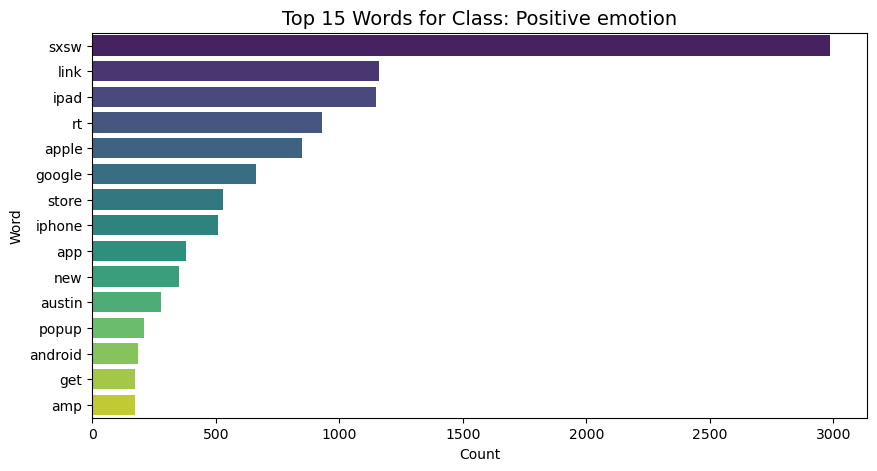

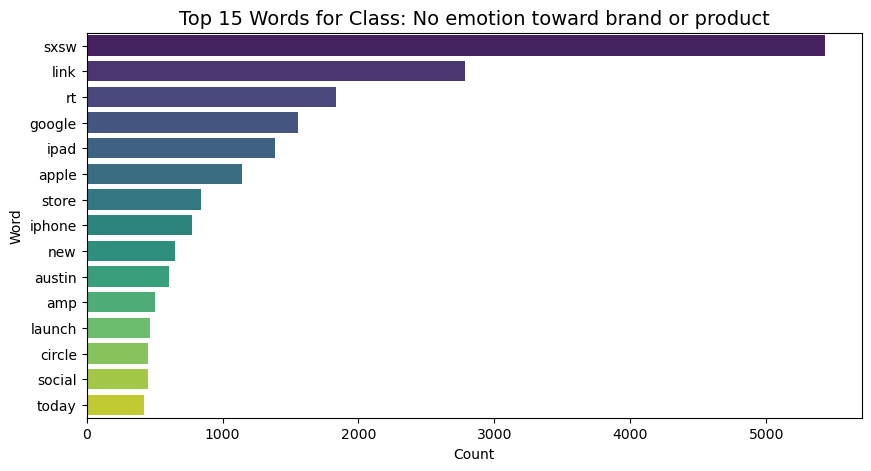

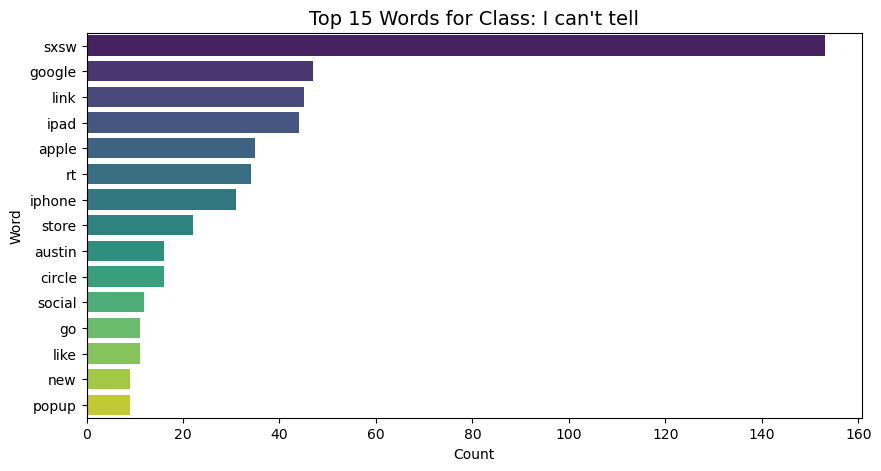

In [163]:
import seaborn as sns

def plot_top_words(corpus, class_name, n=15):
    # Count top words
    word_counts = Counter(" ".join(corpus).split()).most_common(n)
    words, counts = zip(*word_counts)
    
    # Plot
    plt.figure(figsize=(10,5))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(f"Top {n} Words for Class: {class_name}", fontsize=14)
    plt.xlabel("Count")
    plt.ylabel("Word")
    plt.show()

# Loop through classes
for cls in df[target_col].dropna().unique():
    corpus = df.loc[df[target_col] == cls, 'clean_text'].dropna()
    if len(corpus) == 0:
        continue
    plot_top_words(corpus, cls, n=15)


Sentiment/Emotion Distribution

## Brands/Products Mentioned

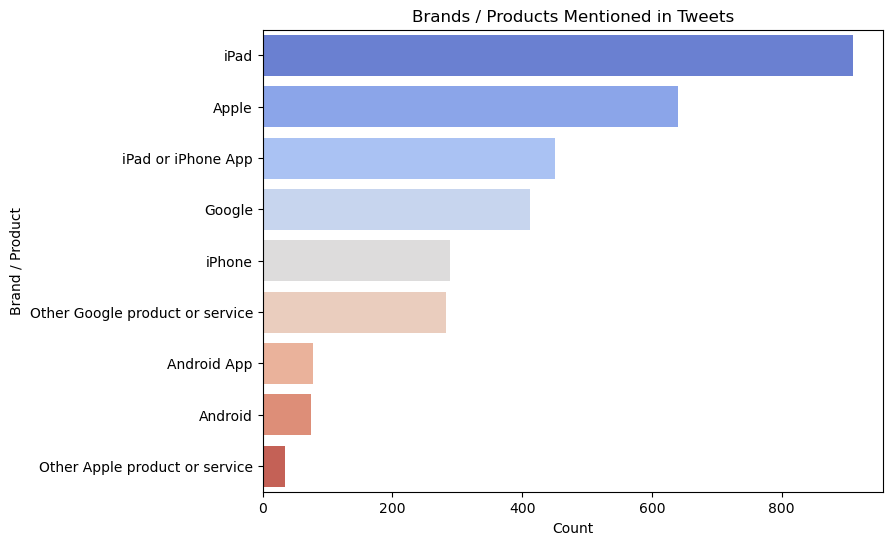

In [101]:
plt.figure(figsize=(8,6))
sns.countplot(
    y="emotion_in_tweet_is_directed_at",
    data=df_viz,
    order=df_viz["emotion_in_tweet_is_directed_at"].value_counts().index,
    palette="coolwarm"
)
plt.title("Brands / Products Mentioned in Tweets")
plt.xlabel("Count")
plt.ylabel("Brand / Product")
plt.show()


### Brands/Products Mentioned
This visualization shows which brands or products are mentioned most frequently.  
It highlights **where customer attention is focused** and which brands receive the most public discussion.


## Word Cloud of All Tweets

### Word Cloud
The word cloud highlights the most common terms in the tweets.  
- Larger words appear more frequently in the dataset.  
- This provides a quick sense of **common themes, products, or issues** being discussed.


## Average Tweet Length per Sentiment

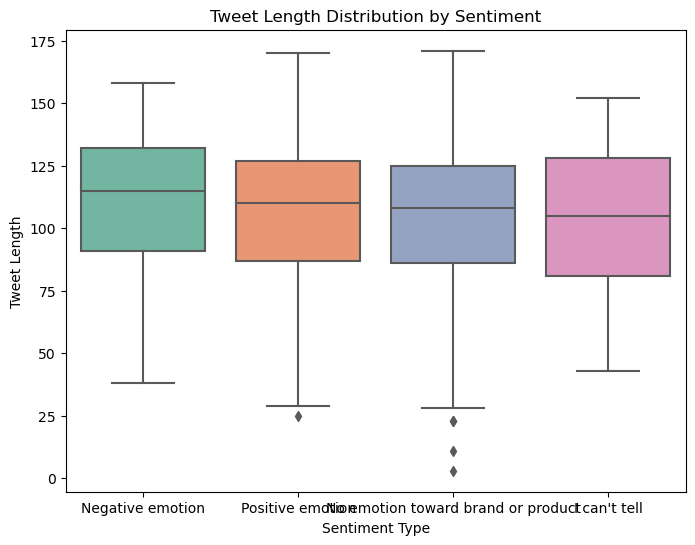

In [104]:
df_viz['tweet_length'] = df_viz['tweet_text'].astype(str).apply(len)

plt.figure(figsize=(8,6))
sns.boxplot(
    x="is_there_an_emotion_directed_at_a_brand_or_product",
    y="tweet_length",
    data=df_viz,
    palette="Set2"
)
plt.title("Tweet Length Distribution by Sentiment")
plt.xlabel("Sentiment Type")
plt.ylabel("Tweet Length")
plt.show()


# Correlation Between Columns

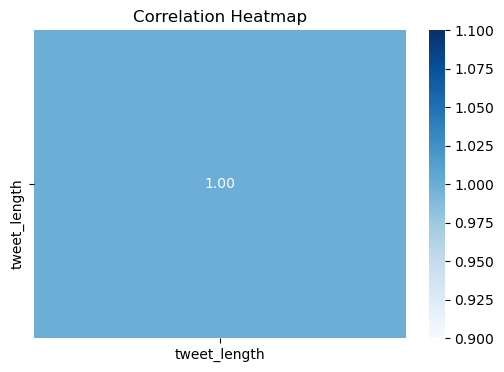

In [105]:
plt.figure(figsize=(6,4))
sns.heatmap(df_viz[['tweet_length']].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Correlation Heatmap
We examined correlations between numerical features.  
Currently, only **tweet length** is numeric, so correlations are minimal.  
When we add engineered features (e.g., word counts, sentiment polarity), this step will reveal stronger insights.


# Top Words per Sentiment

## Emotion Distribution per Brand

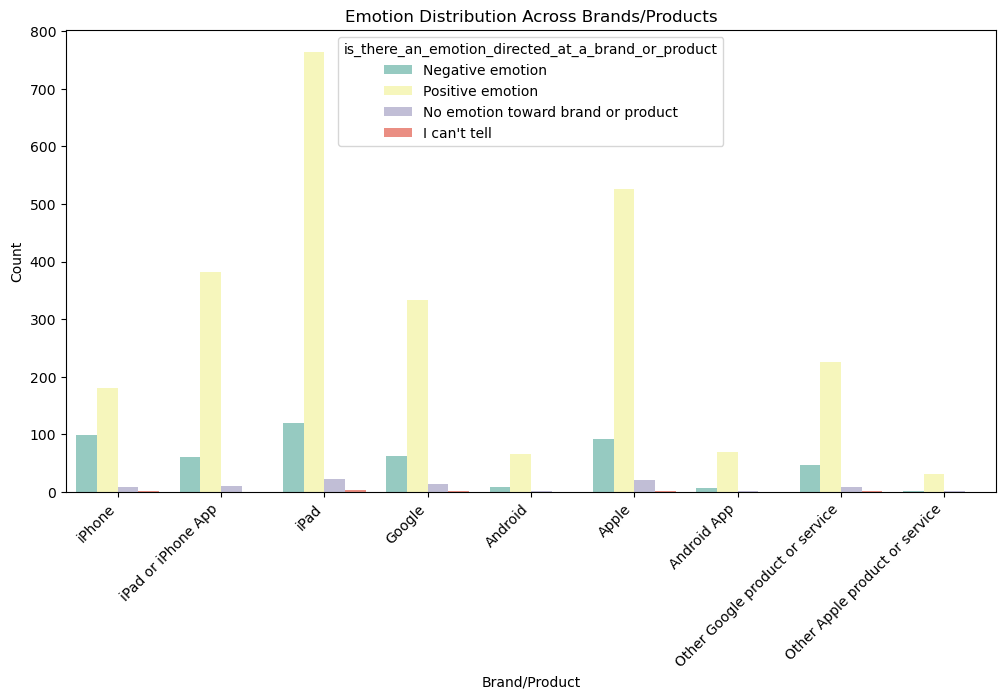

In [107]:
plt.figure(figsize=(12,6))
sns.countplot(
    x="emotion_in_tweet_is_directed_at",
    hue="is_there_an_emotion_directed_at_a_brand_or_product",
    data=df_viz,
    palette="Set3"
)
plt.title("Emotion Distribution Across Brands/Products")
plt.xlabel("Brand/Product")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()


### Emotion Distribution Across Brands/Products
This grouped bar chart shows how **sentiments are distributed per brand/product**.  
We can identify:
- Which brands get more positive mentions.  
- Which ones face more negative reactions.  

This is valuable for **business decision-making** and **brand monitoring**.


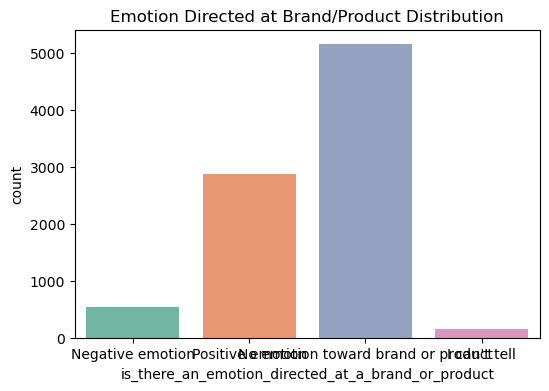

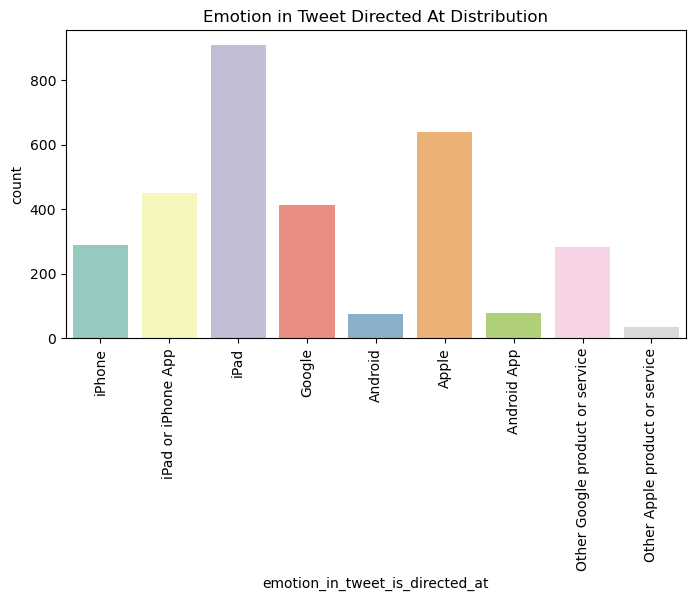

In [45]:
#EDA Visualization
# emotion directed at a brand/product
plt.figure(figsize=(6,4))
sns.countplot(x='is_there_an_emotion_directed_at_a_brand_or_product', data=cleaned_df, palette='Set2')
plt.title('Emotion Directed at Brand/Product Distribution')
plt.show()
#Distribution of all emotions
plt.figure(figsize=(8,4))
sns.countplot(x='emotion_in_tweet_is_directed_at', data=cleaned_df, palette='Set3')
plt.title('Emotion in Tweet Directed At Distribution')
plt.xticks(rotation=90)
plt.show()

In [54]:
#Summary of  categorical distributions
# Count of unique value in each column
# Distribution of emotions directed at a brand/product
print(cleaned_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts())

# Distribution of emotions in tweets
print(cleaned_df['emotion_in_tweet_is_directed_at'].value_counts())



No emotion toward brand or product    5156
Positive emotion                      2869
Negative emotion                       545
I can't tell                           151
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64
iPad                               910
Apple                              640
iPad or iPhone App                 451
Google                             412
iPhone                             288
Other Google product or service    282
Android App                         78
Android                             74
Other Apple product or service      34
Name: emotion_in_tweet_is_directed_at, dtype: int64


In [50]:
# all tweets are strings
cleaned_df['tweet_text'] = cleaned_df['tweet_text'].astype(str)


In [165]:
#Text preprocessing  for NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
     # lowercase
    text = text.lower() 
    # # remove URLs
    text = re.sub(r'http\S+', '', text)  
     # remove punctuation/numbers
    text = re.sub(r'[^a-z\s]', '', text)  
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

cleaned_df['cleaned_tweet'] = cleaned_df['tweet_text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
